# Binary Classification: Support Vector Machine (SVM) Classification with Sklearn

In this implementation of the SVM Classification model, we shall use a Social Network Advertisement dataset which consists of three columns. The first two columns are the independent variables, namely the ‘Age ’and the ‘EstimatedSalary’ and the last column is the dependent variable ‘Purchased’, which is in the binary format denoting whether the individual has bought the product (1) or not (0). In this problem, we have to build a SVM Classification model for a company that will classify whether a user of a particular age and with a particular salary will buy their given product or not. Let us now go through the implementation of the model.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from matplotlib.colors import ListedColormap
plt.style.use("seaborn-whitegrid")

## Load data

In [2]:
# load data and store in df
url = 'https://raw.githubusercontent.com/mk-gurucharan/Classification/master/SocialNetworkAds.csv'
df = pd.read_csv(url)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Explore data

In [3]:
# show descriptive statistics
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Declare features and targets

In [4]:
# create feature (X) and target (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Scale features

In [5]:
# create and fit scaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# standardize features
X_scaled = scaler.transform(X)

## Train-Test Split

In [7]:
# 75:25 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

## Train model
The kernel used here is the “rbf” kernel which stands for Radial Basis Function. There are several other kernels such as the linear and the Gaussian kernels which can also be implemented.

In [8]:
# build and train
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Test model

In [9]:
# make predictions and test model 
yhat = classifier.predict(X_test)
yhat

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, yhat)
print ("Accuracy : ", accuracy_score(y_test, yhat))
print(cm)

Accuracy :  0.93
[[57  6]
 [ 1 36]]


In [11]:
# show actuals and predictions in a df
eval_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':yhat})
eval_df

,Real Values,Predicted Values
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
95,0,0
96,1,1
97,0,0
98,1,1


## Visualize test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


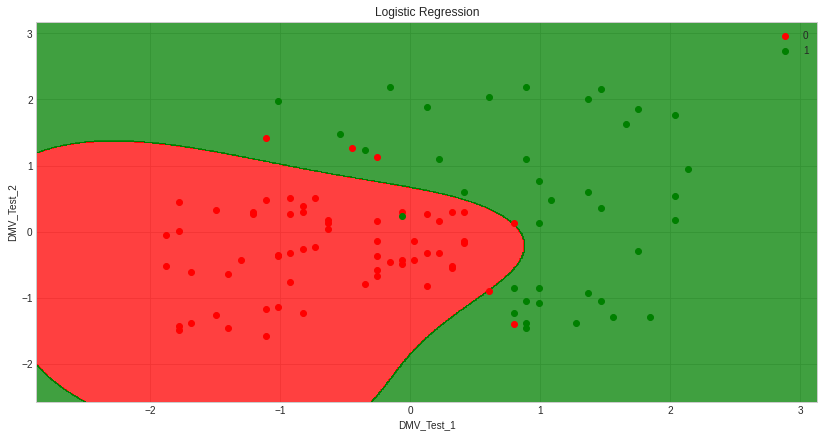

In [12]:
# plot results of regression to show correct and incorrect classification results
plt.figure(figsize=(14,7))

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.legend(facecolor="white")
plt.title('Logistic Regression')
plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.show()

In this plot, There are two regions. The Red region denotes 0, which consists of people who have not bought the product and the Green region denotes 1, which consists of the people who have bought the product. As we have chosen a non-linear kernel (rbf), we are getting regions that are not separated by a linear line.